In [1]:
import pandas as pd
import numpy as np


In [2]:
# Download the data
file = 'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv'
df = pd.read_csv(file)

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,22/12/2021,22,12,2021,1913,40,Austria,AT,AUT,8901064,Europe
1,21/12/2021,21,12,2021,1863,20,Austria,AT,AUT,8901064,Europe
2,20/12/2021,20,12,2021,2131,13,Austria,AT,AUT,8901064,Europe
3,19/12/2021,19,12,2021,2378,17,Austria,AT,AUT,8901064,Europe
4,18/12/2021,18,12,2021,2577,51,Austria,AT,AUT,8901064,Europe


<AxesSubplot:>

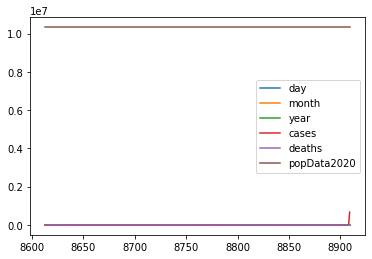

In [10]:
df_nordic = df[df['countriesAndTerritories'] == 'Sweden']
df_nordic.plot()

In [45]:
df_nordic = df[df['countriesAndTerritories'].isin(['Sweden', 'Denmark'])]
df_nordic = df_nordic[['dateRep', 'cases','countriesAndTerritories']]

In [46]:
df_nordic

,dateRep,cases,countriesAndTerritories
1782,22/12/2021,13057,Denmark
1783,21/12/2021,10082,Denmark
1784,20/12/2021,8212,Denmark
1785,19/12/2021,8594,Denmark
1786,18/12/2021,11194,Denmark
...,...,...,...
8905,05/03/2021,4882,Sweden
8906,04/03/2021,4873,Sweden
8907,03/03/2021,6190,Sweden
8908,02/03/2021,2828,Sweden


In [47]:
df_nordic.rename(columns={"dateRep": "date", "countriesAndTerritories": "country"}, inplace=True)
df_nordic

,date,cases,country
1782,22/12/2021,13057,Denmark
1783,21/12/2021,10082,Denmark
1784,20/12/2021,8212,Denmark
1785,19/12/2021,8594,Denmark
1786,18/12/2021,11194,Denmark
...,...,...,...
8905,05/03/2021,4882,Sweden
8906,04/03/2021,4873,Sweden
8907,03/03/2021,6190,Sweden
8908,02/03/2021,2828,Sweden


In [48]:
#Remove negative values and any nans
df_nordic = df_nordic[df_nordic['cases'] >= 0]
np.sum(df_nordic.isna())

date       0
cases      0
country    0
dtype: int64

In [49]:
df_stats = df_nordic.pivot(index='date', columns='country', values='cases')
df_stats.head()

country,Denmark,Sweden
date,,
01/03/2021,211195.0,666139.0
01/04/2021,701.0,8290.0
01/05/2021,874.0,5424.0
01/06/2021,844.0,1898.0
01/07/2021,340.0,560.0


In [50]:
#Remove the first row, since it is an aggregate of prev year data
df_stats = df_stats.iloc[1:]
df_stats.head()

country,Denmark,Sweden
date,,
01/04/2021,701.0,8290.0
01/05/2021,874.0,5424.0
01/06/2021,844.0,1898.0
01/07/2021,340.0,560.0
01/08/2021,739.0,4.0


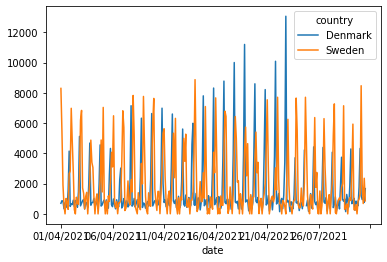

In [51]:
df_stats.plot();

In [52]:
df_stats.corr()

country,Denmark,Sweden
country,,
Denmark,1.000000,0.054702
Sweden,0.054702,1.000000


In [38]:
df_stats[df_stats['Denmark'] > 0]

country,Denmark,Sweden
date,,
25/03/2021,-2001,7706


In [ ]:
def MergeDataByCountries(df, countries):
    df_merged = None
    for country in countries:
        df
        
        
        
        